In [223]:
image

array([[133, 134, 137, ..., 139, 139, 139],
       [135, 136, 137, ..., 139, 139, 139],
       [139, 138, 138, ..., 139, 139, 139],
       ...,
       [138, 139, 139, ..., 140, 140, 140],
       [138, 139, 139, ..., 140, 140, 140],
       [138, 139, 139, ..., 140, 140, 140]], dtype=uint8)

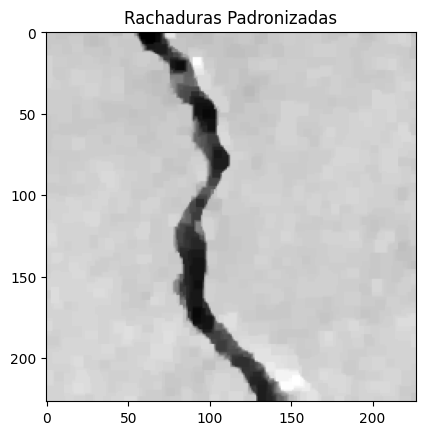

In [259]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('dataset/Positive/00003.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar fechamento morfológico para preencher pequenas lacunas
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=2)

# Remover pequenos pontos isolados (operação de abertura morfológica)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=2)

# Identificar componentes conectados
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8)

# Remover pequenos componentes baseado em um limiar de área
area_threshold = 50  # Ajuste este valor conforme necessário
for i in range(1, num_labels):  # Começar de 1 para ignorar o fundo
    if stats[i, cv2.CC_STAT_AREA] < area_threshold:
        opening[labels == i] = 0
        
# thresh_adaptativo = cv2.adaptiveThreshold(opening, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                                            cv2.THRESH_BINARY, 15, 5)
# Mostrar o resultado
plt.imshow(opening, cmap='gray')
plt.title('Rachaduras Padronizadas')
plt.show()


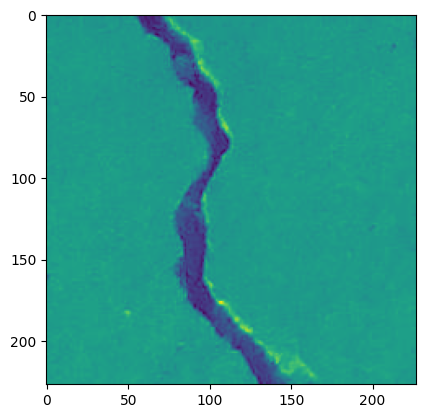

In [260]:
plt.imshow(image)

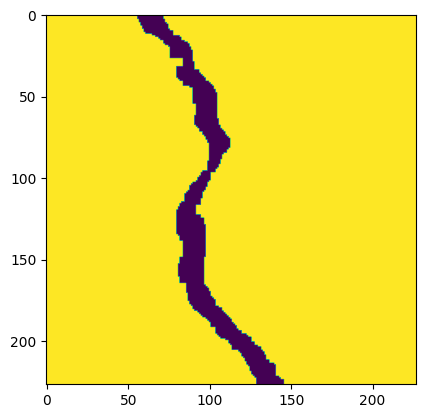

In [261]:
plt.imshow(np.where(opening < 110, 0, 255))

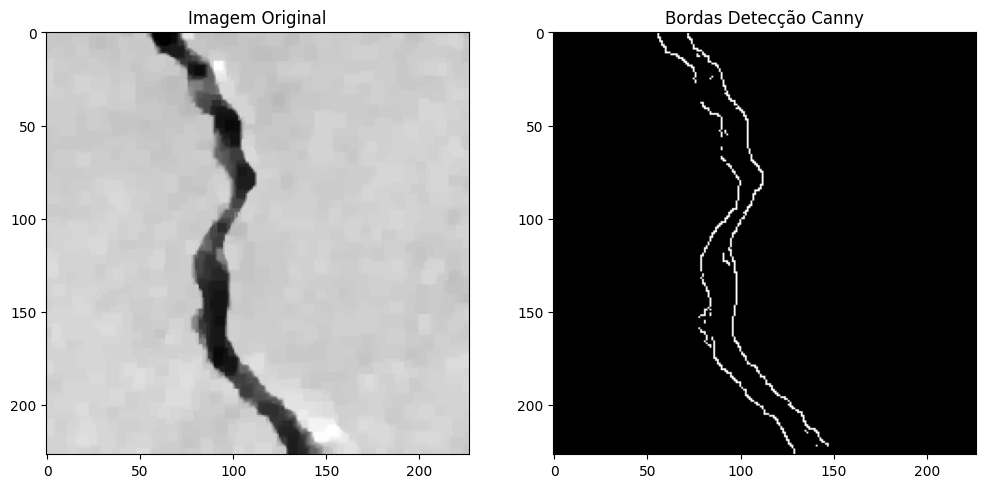

In [262]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
image = opening

# Aplicar o detector de borda Canny
edges_canny = cv2.Canny(image, threshold1=100, threshold2=100)

# Exibir a imagem original e a imagem com as bordas detectadas
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(edges_canny, cmap='gray'), plt.title('Bordas Detecção Canny')
plt.show()


## Tenta fazer um processo de marcação de pontos da rachadura e considera os pontos mais marcados

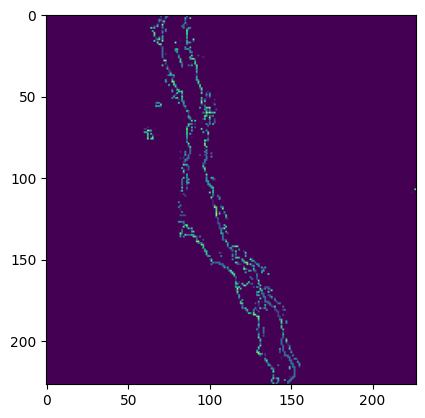

In [171]:
plt.imshow(arr)

In [172]:
arr[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 144,   0,   0,  76,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 244,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [117]:
arr = np.zeros_like(edges_canny)

In [116]:
arr.shape[0]

0

In [128]:
edges_canny

array([[  0, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0, 255, 255],
       ...,
       [255,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ..., 255,   0,   0]], dtype=uint8)

In [136]:
image = cv2.imread('dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)


arr = None
for i in range(200):
    for j in range(200):
        # Aplicar o detector de borda Canny
        edges_canny = cv2.Canny(image, threshold1=i, threshold2=j)
        if arr is None:
            arr = np.zeros_like(edges_canny)
        else:
            binary_array = np.asarray(np.where(edges_canny == 255, 1, 0), dtype=np.uint8)
            arr += binary_array
        

KeyboardInterrupt: 

In [139]:
def print_progress_bar(value, max_value):
    """
    Imprime uma barra de progresso na linha de comando.

    :param value: valor atual do progresso
    :param max_value: valor máximo do progresso
    """
    # Calcula a porcentagem de conclusão
    percentage = (value / max_value) * 100
    # Calcula o número de caracteres '==' a serem mostrados
    num_equals = int((percentage / 100) * 60)
    # Cria a barra de progresso
    bar = '[' + '=' * num_equals + '>' + ' ' * (60 - num_equals) + ']'
    # Imprime a barra de progresso com a porcentagem, usando retorno de carro para sobrescrever a linha
    print(f'\r{bar} - {percentage:.2f}%', end='')

In [189]:
import numpy as np
import cv2
from tqdm import tqdm

# Substitua o caminho abaixo pelo caminho correto da sua imagem
# image = cv2.imread('caminho_para_sua_imagem.jpg', cv2.IMREAD_GRAYSCALE)

# Inicializar o array acumulador
arr = None

range_threshold1 = 50
range_threshold2 = 100

bar_max = range_threshold1 * range_threshold2
current_bar = 0

for i in range(100, 150):
    for j in range(100, 200):
        # Aplicar o detector de borda Canny
        edges_canny = cv2.Canny(image, threshold1=i, threshold2=j)
        
        # Inicializar o arr com zeros se ainda não foi inicializado
        if arr is None:
            arr = np.zeros_like(edges_canny)
        
        # Transformar valores 255 em 1
        binary_array = np.asarray(np.where(edges_canny == 255, 1, 0), dtype=np.uint8)
        
        # Acumular os valores
        arr += binary_array

        current_bar+=1
        print_progress_bar(current_bar, bar_max)


# Agora 'arr' contém a soma dos valores binários de todas as iterações
# print(arr)


[============================================================>] - 100.00%

In [190]:
def find_important_points(arr):
    # Lista para armazenar os pontos mais importantes
    important_points = []

    # Percorrer cada linha do array
    for row in arr:
        if np.max(row) == 0:
            # Se a linha inteira for zero, continue para a próxima linha
            important_points.append((None, None))
            continue
        
        # Encontrar os índices dos dois maiores valores
        # Usamos np.argpartition para eficiência em grandes arrays
        idxs = np.argpartition(row, -2)[-2:]
        
        # Organizar os índices para que o ponto com maior valor venha primeiro
        important_points_in_row = sorted(idxs, key=lambda x: row[x], reverse=True)
        
        # Adicionar os pontos mais importantes para a lista
        important_points.append(important_points_in_row)

    return important_points

In [191]:
# Obter os pontos importantes
important_points = find_important_points(arr)

arr2 = None
# Para visualizar os pontos importantes
for line_idx, (point1, point2) in enumerate(important_points):
    #print(f"Linha {line_idx}: Ponto 1 na coluna {point1}, Ponto 2 na coluna {point2}")
    if arr2 is None:
        arr2 = np.zeros_like(edges_canny)
    arr2[line_idx][point1] = 255
    arr2[line_idx][point2] = 255

arr2 = np.asarray(arr2, dtype=np.uint8)

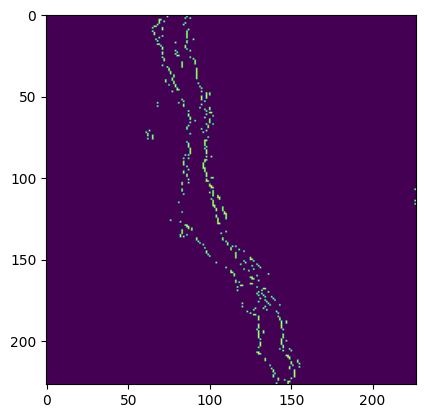

In [192]:
plt.imshow(arr2)

In [163]:
arr[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 144,   0,   0,  64,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  72,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [105]:
# Transformar valores 255 em 1
binary_array = np.where(edges_canny == 255, 1, 0)


In [106]:
binary_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
image

array([[133, 134, 137, ..., 139, 139, 139],
       [135, 136, 137, ..., 139, 139, 139],
       [139, 138, 138, ..., 139, 139, 139],
       ...,
       [138, 139, 139, ..., 140, 140, 140],
       [138, 139, 139, ..., 140, 140, 140],
       [138, 139, 139, ..., 140, 140, 140]], dtype=uint8)

In [55]:
edges_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

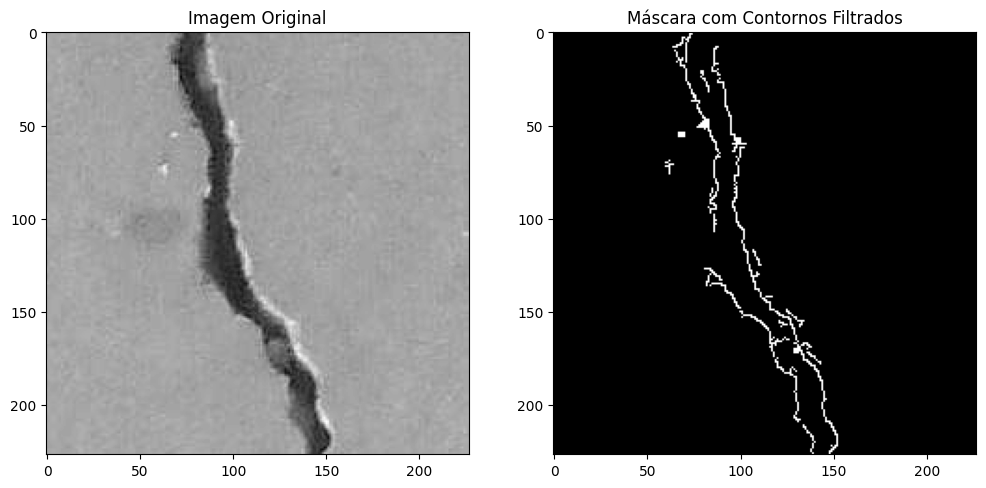

In [102]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar o detector de borda Canny
edges_canny = cv2.Canny(image, threshold1=100, threshold2=100)

# Encontrar contornos na imagem das bordas
contours, _ = cv2.findContours(edges_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma máscara para desenhar os contornos válidos
mask = np.zeros_like(edges_canny)

# Definir um limiar de área para os contornos (este valor pode precisar de ajustes)
area_threshold = 1

# Loop para filtrar e desenhar apenas os contornos que passam do limiar de área
for contour in contours:
    if cv2.contourArea(contour) > area_threshold:
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

# Exibir a imagem original e a máscara com os contornos filtrados
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(mask, cmap='gray'), plt.title('Máscara com Contornos Filtrados')
plt.show()


In [204]:
image = cv2.imread('dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)

In [205]:
edges_canny[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [206]:
np.where(edges_canny[i] == 255)[0].shape[0]

3

In [207]:
for i in range(edges_canny.shape[0]):
    if np.where(edges_canny[i] == 255)[0].shape[0] > 0:
        first = np.where(edges_canny[i] == 255)[0][0]
        last = np.where(edges_canny[i] == 255)[0][-1]
        image[i][first] = 255
        image[i][last] = 255

In [208]:
edges_canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

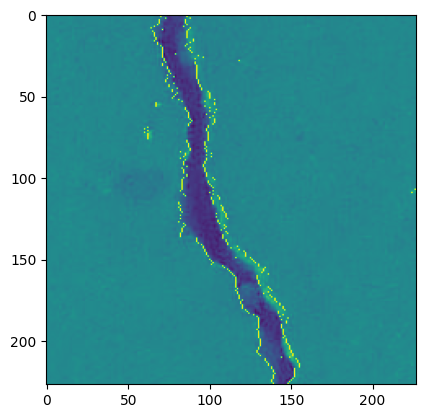

In [209]:
plt.imshow(image)

In [7]:
edges_canny.shape

(227, 227)

In [8]:
edges_canny.shape[0] * edges_canny.shape[1]

51529

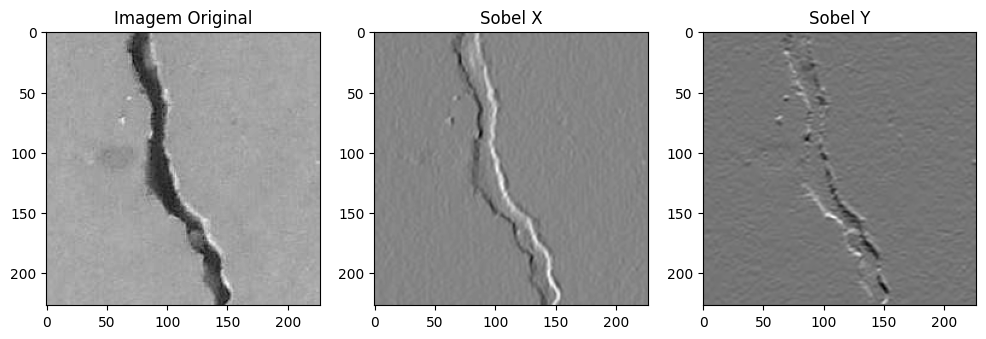

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar Sobel x e Sobel y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Combinar ambos
sobel_combined = cv2.magnitude(sobelx, sobely)

# Exibir a imagem original e a imagem com as bordas detectadas
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(133), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.show()


In [15]:
import cv2
import numpy as np

# Carregar a imagem e aplicar detecção de borda (aqui, usando Canny)
image = cv2.imread('dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, threshold1=100, threshold2=200)

# Encontrar contornos
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular a área para cada contorno e somá-las
total_area = sum(cv2.contourArea(contour) for contour in contours)

print(f"Área total das rachaduras: {total_area} pixels quadrados")


Área total das rachaduras: 178.5 pixels quadrados


In [19]:
for contour in contours:
    print(contour)

[[[134 211]]

 [[134 212]]

 [[136 214]]

 [[136 215]]

 [[137 215]]

 [[138 216]]

 [[138 217]]

 [[139 218]]

 [[139 219]]

 [[140 220]]

 [[139 221]]

 [[139 223]]

 [[138 224]]

 [[138 225]]

 [[139 226]]

 [[138 225]]

 [[138 224]]

 [[139 223]]

 [[139 221]]

 [[140 220]]

 [[139 219]]

 [[139 217]]

 [[135 213]]

 [[135 212]]]
[[[147 199]]

 [[147 201]]

 [[148 202]]

 [[148 203]]

 [[149 204]]

 [[149 205]]

 [[150 206]]

 [[150 207]]

 [[151 208]]

 [[151 209]]

 [[151 208]]

 [[150 207]]

 [[150 206]]

 [[149 205]]

 [[149 203]]

 [[147 201]]]
[[[120 175]]

 [[119 176]]

 [[119 177]]

 [[120 178]]

 [[120 180]]

 [[121 180]]

 [[124 183]]

 [[126 183]]

 [[127 184]]

 [[128 184]]

 [[130 186]]

 [[130 192]]

 [[129 193]]

 [[130 194]]

 [[130 198]]

 [[131 199]]

 [[131 203]]

 [[130 204]]

 [[130 205]]

 [[129 206]]

 [[129 207]]

 [[131 209]]

 [[132 208]]

 [[131 208]]

 [[129 206]]

 [[130 205]]

 [[130 204]]

 [[131 203]]

 [[131 199]]

 [[130 198]]

 [[130 194]]

 [[129

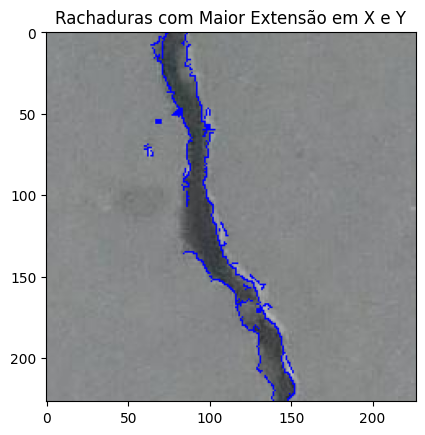

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('dataset/Positive/00001.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detecção de borda
edges = cv2.Canny(gray_image, 100, 200)

# Encontrar contornos
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializar variáveis para o maior trecho
max_x_extent = 0
max_y_extent = 0
max_x_contour = None
max_y_contour = None

# Processar cada contorno
for contour in contours:
    x, y, width, height = cv2.boundingRect(contour)
    if width > max_x_extent:
        max_x_extent = width
        max_x_contour = contour
    if height > max_y_extent:
        max_y_extent = height
        max_y_contour = contour

    # Desenhar o contorno com preenchimento azul
    cv2.drawContours(image, [contour], -1, (255, 0, 0, 0.5), thickness=cv2.FILLED)

# Marcar os maiores trechos em X e Y
if max_x_contour is not None:
    x, y, width, height = cv2.boundingRect(max_x_contour)
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 2)

if max_y_contour is not None:
    x, y, width, height = cv2.boundingRect(max_y_contour)
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 2)

# Exibir a imagem
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Rachaduras com Maior Extensão em X e Y')
plt.show()
